# Off Facebook Activity Report

## Author: Tovin McVay Jr

### Overview
In this report I will be analyzing my off facebook activity data. My hypothesis over this is what app or website looks at my interactions the most.

What is off facebook activity ?
Off-Facebook activity is a summary of activity that businesses and organizations share with us about your interactions with them, such as visiting their apps or websites.

### Data

For this report the data is from Facebook, and I requested to download it so I can use the data for thie purpose.

In [8]:
import json
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as ny
import time 
import pandas as pd

Above is all of the packages that I may or may not use to determine my hypothesis.

In [9]:
with open(r'C:\Users\tjrai\EMAT22110\TM_FB_Data\ads_and_businesses\your_off-facebook_activity.json') as f:
    act = json.load(f)
act.keys()

dict_keys(['off_facebook_activity'])

Above is getting ready to load in my file to analyze my off facebook activity.

In [10]:
type(act['off_facebook_activity'])

list

In [11]:
act['off_facebook_activity'][0]

{'name': 'Rockstar Games',
 'events': [{'id': 334424681143086,
   'type': 'PURCHASE',
   'timestamp': 1611294900}]}

In [12]:
act['off_facebook_activity'][0].keys()

dict_keys(['name', 'events'])

In [13]:
act['off_facebook_activity'][0]['events'][0]['type']

'PURCHASE'

In [44]:
act['off_facebook_activity'][0]['events'][0]['type'] == 'PURCHASE'

True

Here I am showing the exmaples of pulling the information from the file. It is showing the most recent actvity type which was a purchase made to a website.

In [15]:
apps_requests = [x['name'] for x in act['off_facebook_activity']]
all_event_count = [len(x['events']) for x in act['off_facebook_activity']]
activation_count = [len([x for x in j['events'] if x['type'] == 'ACTIVATE_APP']) for j in act['off_facebook_activity']]
custom_count = [len([x for x in j['events'] if x['type'] == 'CUSTOM']) for j in act['off_facebook_activity']]
search_count = [len([x for x in j['events'] if x['type'] == 'SEARCH']) for j in act['off_facebook_activity']]
view_content_count = [len([x for x in j['events'] if x['type'] == 'VIEW_CONTENT']) for j in act['off_facebook_activity']]
ad_request_count = [len([x for x in j['events'] if x['type'] == 'AD_REQUEST']) for j in act['off_facebook_activity']]
page_view_count = [len([x for x in j['events'] if x['type'] == 'PAGE_VIEW']) for j in act['off_facebook_activity']]
purchase_count =[len([x for x in j['events'] if x['type'] == 'PURCHASE']) for j in act['off_facebook_activity']]

In [16]:
apps = []
events = []
actapp = []
custom = []
search = []
viewc = []
ad = []
pview = []
purchase = []

for i in act['off_facebook_activity']:
    apps.append(i['name'])
    events.append((len(i['events'])))
    actapp.append(len([x for x in i['events'] if x['type'] == 'ACTIVATE_APP']))
    custom.append(len([x for x in i['events'] if x['type'] == 'CUSTOM']))
    search.append(len([x for x in i['events'] if x['type'] == 'SEARCH']))
    viewc.append(len([x for x in i['events'] if x['type'] == 'VIEW_CONTENT']))
    ad.append(len([x for x in i['events'] if x['type'] == 'AD_REQUEST']))
    pview.append(len([x for x in i['events'] if x['type'] == 'PAGE_VIEW']))
    purchase.append(len([x for x in i['events'] if x['type'] == 'PURCHASE']))

Above is me gathering all the event types that are associated with my facebook activity, getting ready to create a table to organize the information

In [46]:
appbyevent = pd.DataFrame(columns = ('App/Website', 'Event Count', 'Activate App', 'Custom', 'Search', 'View Content', 'Ad Request', 'Page Views', 'Purchase'))
appbyevent['App/Website'] = apps
appbyevent['Event Count'] = events
appbyevent['Activate App'] = actapp
appbyevent['Custom'] = custom
appbyevent['Search'] = search
appbyevent['View Content'] = viewc
appbyevent['Ad Request'] = ad
appbyevent['Page Views'] = pview
appbyevent['Purchase'] = pview
appbyevent.head()

,App/Website,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views,Purchase
0,Rockstar Games,1,0,0,0,0,0,0,0
1,andarwallets.com,1,0,0,0,0,0,1,1
2,groupon.com,4,0,0,0,1,0,3,3
3,buffalowildwings.com,1,0,0,0,0,0,1,1
4,footlocker.com,1,0,0,0,0,0,1,1


From all the event types a table was made to show the 5 most recent Apps and Websites we can see in the table that these sites have not been doing much with my information. I am rarely on facebook as I use to be years before and so that could be the reason for not much going on.

In [47]:
sub_apps = appbyevent[['App/Website', 'Event Count', 'Activate App', 'Custom', 'View Content', 'Page Views', 'Purchase']].loc[appbyevent['Event Count'] > 5]
sub_apps

,App/Website,Event Count,Activate App,Custom,View Content,Page Views,Purchase
11,Dick's Sporting Goods,6,0,0,0,0,0
14,Spotify: Music and Podcasts,8,3,5,0,0,0
15,Twitch: Live Game Streaming,6,6,0,0,0,0
20,Walgreens,9,9,0,0,0,0
21,goldenrulelabs.com,10,0,0,0,10,10
22,Airbnb,41,18,23,0,0,0
23,kent.edu,59,0,0,16,43,43
29,The Home Depot,10,0,10,0,0,0
36,TikTok - Make Your Day,79,27,52,0,0,0
39,Quizlet,91,0,71,0,0,0


The goal for this report is to see whihch app or website show the most interaction I have had with it and so a new table was made to show the event count of the site that have more than 25 interactions that I have made with it.

In [27]:
from scipy import stats

Imported a package to view the statistic of it

In [36]:
stats.chisquare(appbyevent['Event Count'])

Power_divergenceResult(statistic=3054.1873804971315, pvalue=0.0)

This was more of observation of it just to see what the result would be above, its giving the stat of all of this files event counts are and totaling them up to create an average.

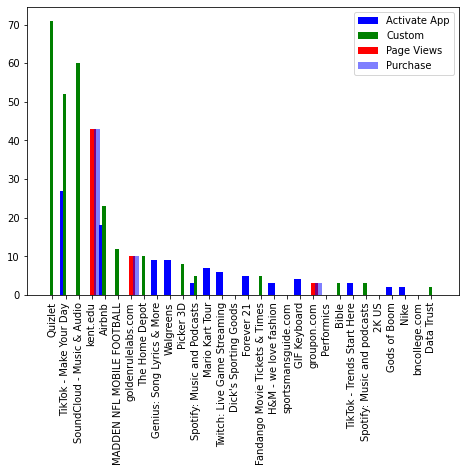

In [11]:
appbyevent = appbyevent.sort_values(by = ['Event Count'], ascending = False)
X = ny.arange(30)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, appbyevent['Activate App'][0:30], color='b', width = .5)
ax.bar(X + 0.15, appbyevent['Custom'][0:30], color='g', width = .25)
ax.bar(X + 0.30, appbyevent['Page Views'][0:30], color='r', width = .5)
ax.bar(X+.60, appbyevent['Purchase'][0:30], color = 'b', alpha =.5, width = .5)
plt.xticks(ticks=X+.2, labels = list(appbyevent['App'][0:30]), rotation=90)
ax.legend(labels=['Activate App', 'Custom', 'Page Views', 'Purchase'])
plt.show()

Here I decided to add a similar graph from the examples just because I was having some difficulties producing one from scratch but it shows the 30 apps and sites I have interacted with from greatest to least.

## Analysis/Conclusion

The report showed that Quizlet was the top account with the most interaction I had with it with having 79 "Custom" Then Tiktok with being the highest for "Active App" at 29 and Kent.edu tied with "Page View" and "Purchase" at 47. This report was very complex in my opinion trying to put the data into differnt forms to visualize it was the hardest part of it. But I am very surprised that from all my apps that quizlet would be the highest one. I do use it to create flash cards or looking premade ones to study with. The others I agree with because the type it falls under are what I usally do with it when I am on that website or app. To wrap this up I learned a little more about what facebook does with my account and it really makes you think what other apps are watching what you are doing. 